In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
df = pd.read_csv("Datasets2\PrimaIndiansDataset.csv")
df.columns



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
def draw_hist(dataframe):
    for column in dataframe.columns:
        print(column)
        plt.figure()
        dataframe[column].hist()

        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f"Distribution of {column}")
        plt.show()

In [5]:
print(df.info(verbose=True,memory_usage=False))
print("Null values =",df.isnull().values.any())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)None
Null values = False
(768, 9)


In [6]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
print(df.head())
print(df.tail())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

[268, 500]


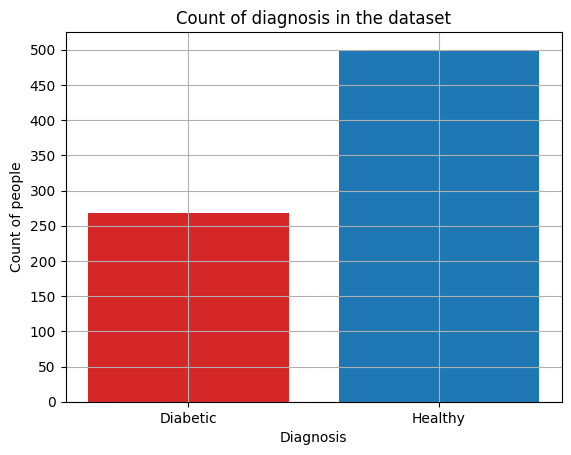

In [8]:

outcomes = ("Diabetic","Healthy")
outcome_counts = [len(df.loc[df['Outcome']==1]), len(df.loc[df['Outcome']==0])]
print(outcome_counts)
# display as a graph

colours=['tab:red', 'tab:blue']

fig, ax = plt.subplots()

ax.bar(outcomes, outcome_counts, color=colours)

ax.set_ylabel("Count of people")
ax.set_xlabel("Diagnosis")
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=50)) # Y axis increments at 50 
plt.title('Count of diagnosis in the dataset')
plt.grid()
plt.show()

In [9]:
#exploring number of 0 values
INempty_val = df.loc[df['Insulin'] == 0]
print("Insulin 0 =",len(INempty_val))

BMIempty_val=df.loc[df['BMI']==0]
print("BMI 0 =",len( BMIempty_val))

Gempty_val=df.loc[df['Glucose']==0]
print("Glucose 0 =",len( Gempty_val))

BPempty_val=df.loc[df['BloodPressure']==0]
print("BP 0 = ",len(BPempty_val))

STempty_val=df.loc[df['SkinThickness']==0]
print("Skin thickness 0 = ", len(STempty_val))

# create graph




Insulin 0 = 374
BMI 0 = 11
Glucose 0 = 5
BP 0 =  35
Skin thickness 0 =  227


Correlation Matrix 

Correlation matrix =


<Axes: >

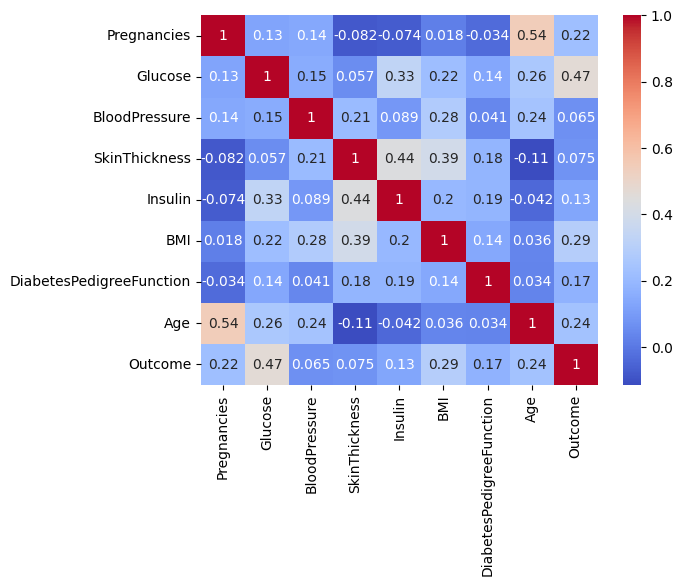

In [10]:
matrix = df.corr()
print ("Correlation matrix =")
sns.heatmap(matrix,cmap='coolwarm',annot=True)


Histograms displaying distrubution of feature values 


In [11]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Pregnancies


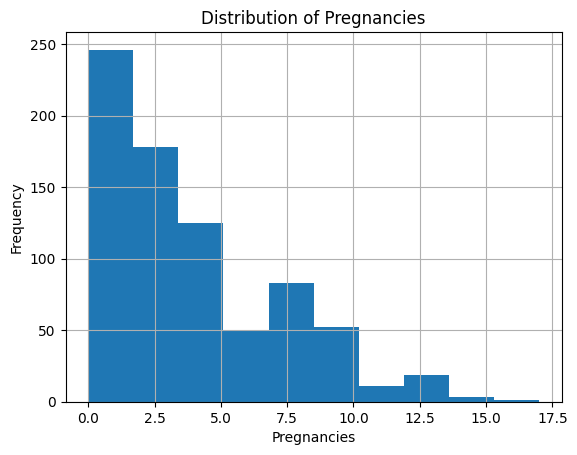

Glucose


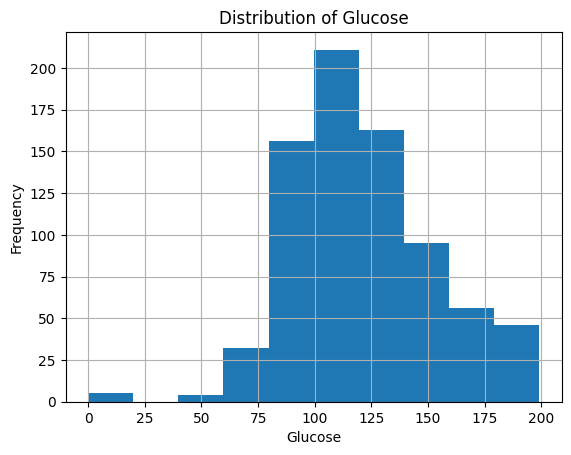

BloodPressure


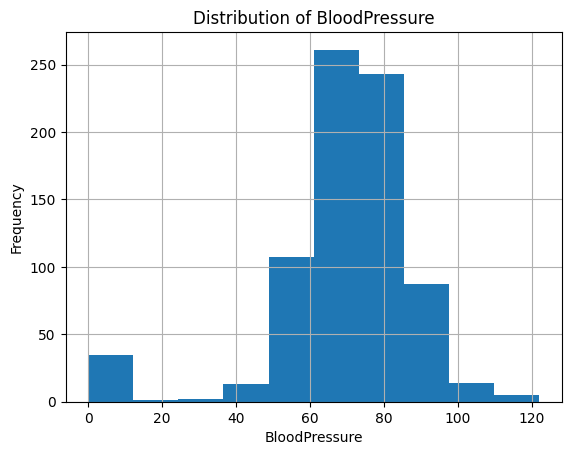

SkinThickness


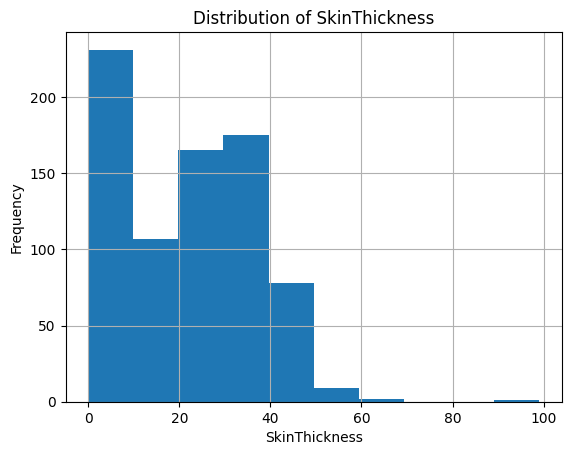

Insulin


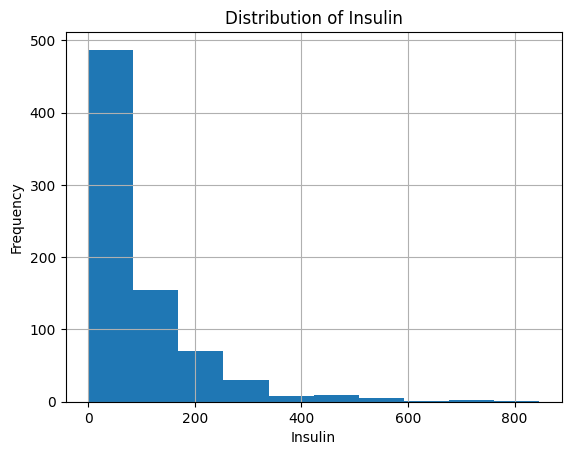

BMI


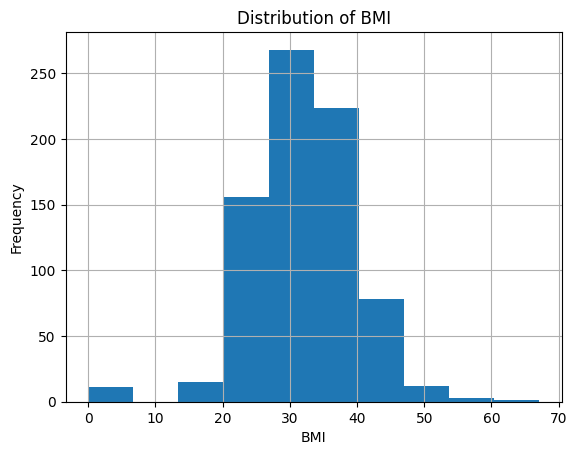

DiabetesPedigreeFunction


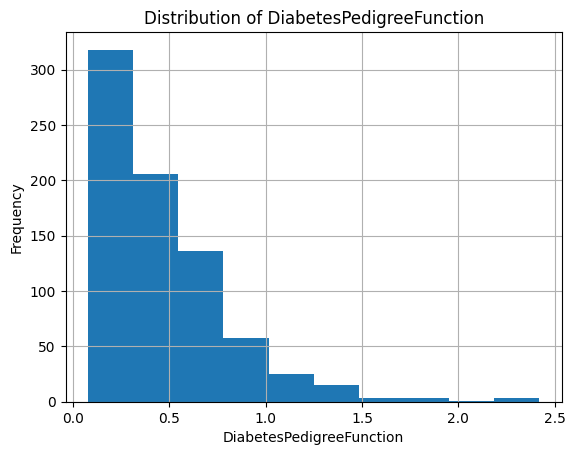

Age


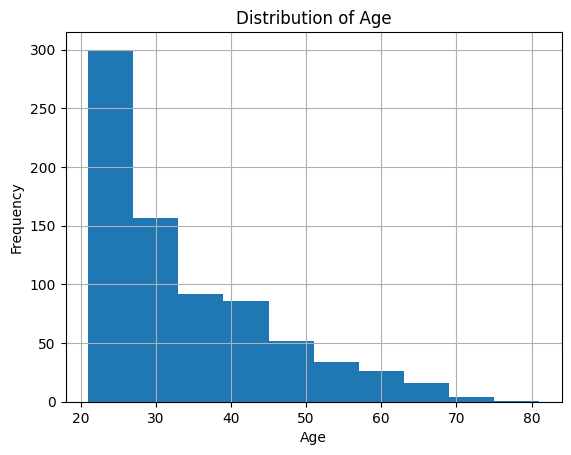

Outcome


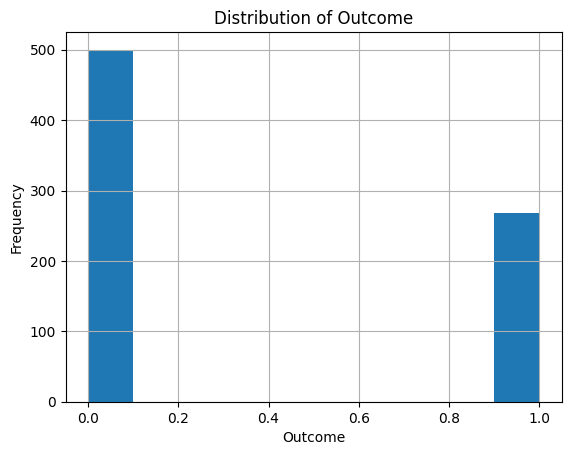

In [12]:

draw_hist(df)


Comparing distrubution of features that contain 0 values
- First create a copy of the dataframe
- Then convert the 0 values to null
- Then create a list of features that contain values
- Display histogram for features 

In [13]:
df_copy = df.copy(deep=True)

In [14]:

empty_columns = []
for column in df_copy.columns:
    if (df_copy[column] == 0).any():
        empty_columns.append(column)

empty_columns.remove("Pregnancies")
empty_columns.remove("Outcome")
print(empty_columns)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


Convert 0 values in above features to null

In [16]:
df_copy['Glucose']= df_copy['Glucose'].replace(0,np.nan)
df_copy['BloodPressure']= df_copy['BloodPressure'].replace(0,np.nan)
df_copy['SkinThickness']= df_copy['SkinThickness'].replace(0,np.nan)
df_copy['BMI']= df_copy['BMI'].replace(0,np.nan)
df_copy['Insulin'] =df_copy['Insulin'].replace(0,np.nan)


Statisical Analysis of the updated data

In [17]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
INnan_val = df_copy['Insulin'].isna().sum()
print("Insulin 0 =",INnan_val)

BMInan_val=df_copy['BMI'].isna().sum()
print("BMI 0 =",BMInan_val)

Gnan_val=df_copy['Glucose'].isna().sum()
print("Glucose 0 =",Gnan_val)

BPnan_val=df_copy['BloodPressure'].isna().sum()
print("BP 0 = ",BPnan_val)

STnan_val=df_copy['SkinThickness'].isna().sum()
print("Skin thickness 0 = ", STnan_val)


Insulin 0 = 374
BMI 0 = 11
Glucose 0 = 5
BP 0 =  35
Skin thickness 0 =  227


Distrubution of updates features as histograms

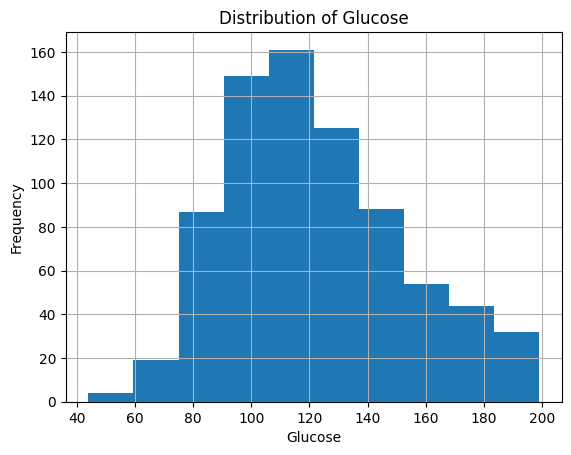

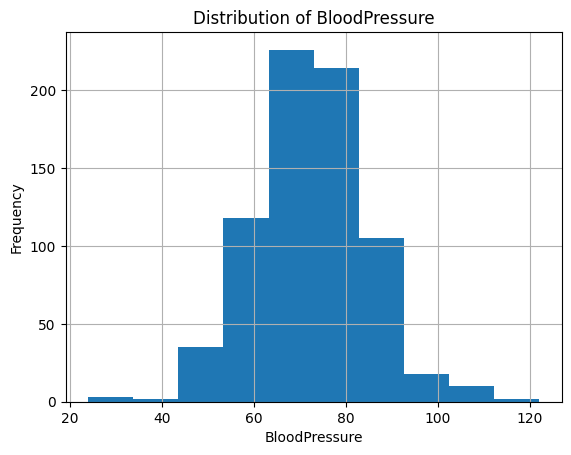

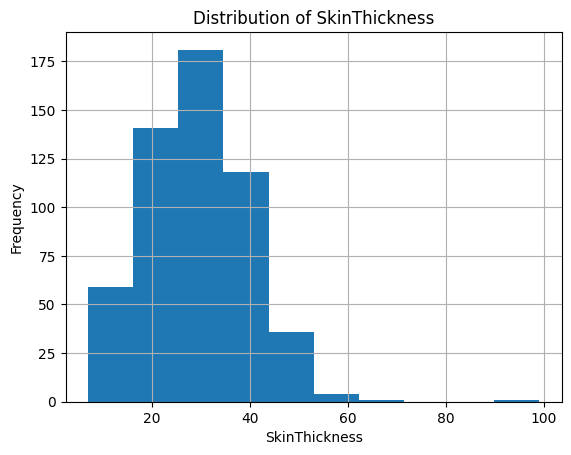

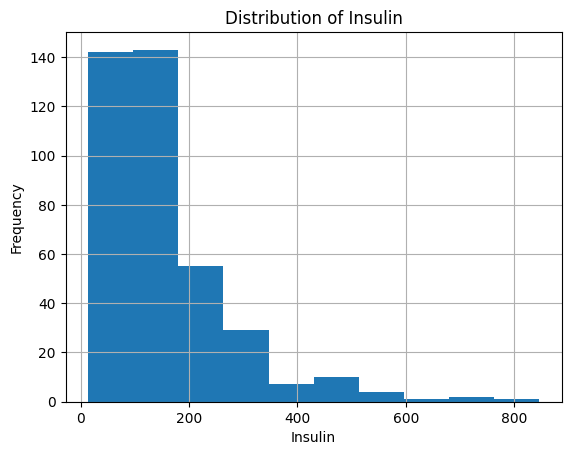

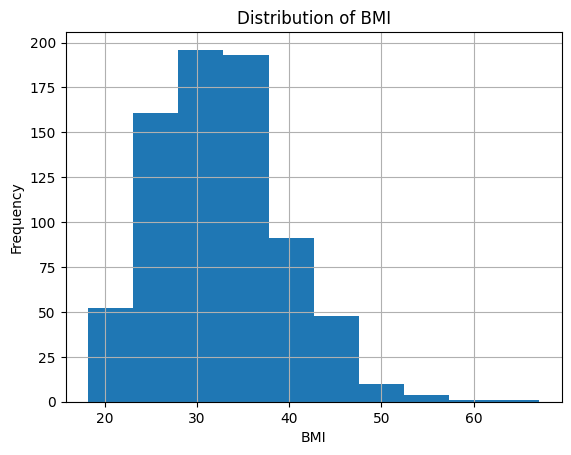

In [19]:
def draw_hist2(dataframe,cols):
    for column in cols:
        plt.figure()
        dataframe[column].hist()

        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f"Distribution of {column}")
        plt.show()
# had to be reworked only display specfic vals 



draw_hist2(df_copy,empty_columns)
